<a href="https://colab.research.google.com/github/hemoabdullah/PCVK_smst5/blob/main/week7_CaseMethod1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import google.colab.drive

google.colab.drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from skimage import io
import os
import glob
from google.colab.patches import cv2_imshow
from PIL import Image as im


Mounted at /content/drive


**Part A**

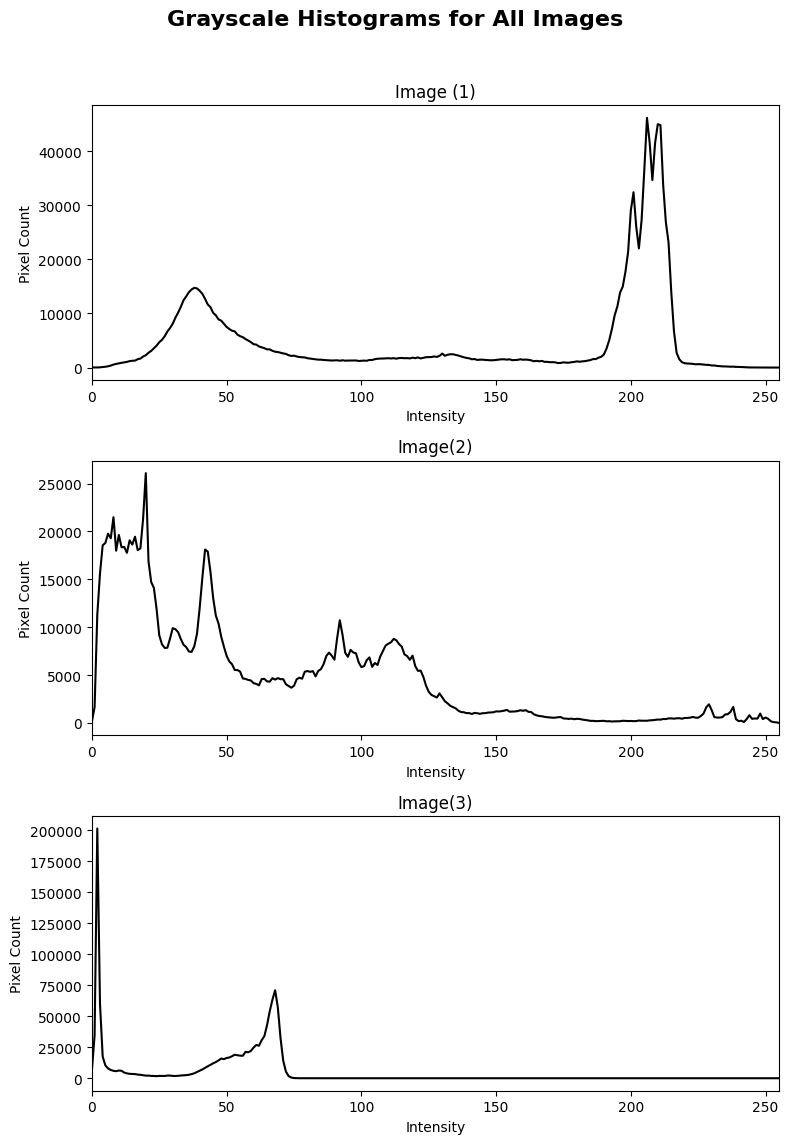

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img1 = cv.imread('/content/drive/MyDrive/PCVK/Image/formal.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('/content/drive/MyDrive/PCVK/Image/bright-dark.jpg', cv.IMREAD_GRAYSCALE)
img3 = cv.imread('/content/drive/MyDrive/PCVK/Image/dark.jpg', cv.IMREAD_GRAYSCALE)

images = [img1, img2, img3]
titles = ['Image (1)', 'Image(2)', 'Image(3)']

fig, axs = plt.subplots(3, 1, figsize=(8, 12))
fig.suptitle('Grayscale Histograms for All Images', fontsize=16, fontweight='bold')

for i, img in enumerate(images):
    hist = cv.calcHist([img], [0], None, [256], [0, 256])

    axs[i].plot(hist, color='black')
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('Intensity')
    axs[i].set_ylabel('Pixel Count')
    axs[i].set_xlim([0, 255])

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()


Please Enter a value of alpha: 1.3
Please Enter a value of beta: 20


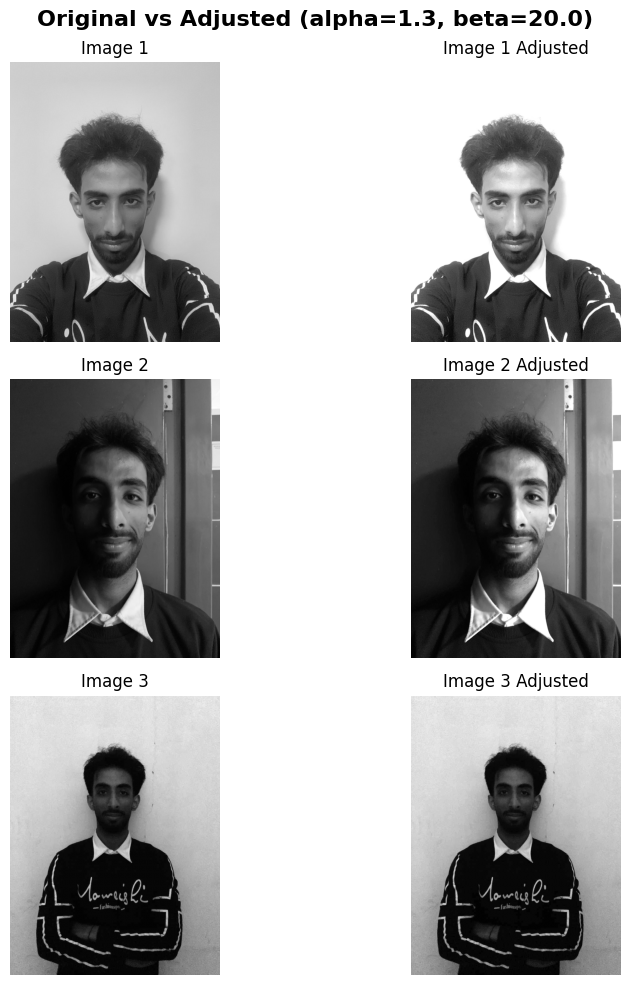

In [6]:
listImg = [img1, img2, img3]

try:
    alpha = float(input("Please Enter a value of alpha: "))
    beta = float(input("Please Enter a value of beta: "))
except ValueError:
    print("This is not a number!")

adjusted_Imglist = []
for img in listImg:
    adjusted = cv.convertScaleAbs(img, alpha=alpha, beta=beta)
    adjusted_Imglist.append(adjusted)


titles = ['Image 1', 'Image 2', 'Image 3']
title_adj = ['Edited Image 1', 'Edited Image 2', 'Edited Image 3']

fig, axs = plt.subplots(len(listImg), 2, figsize=(10, 10))
fig.suptitle(f'Original vs Adjusted (alpha={alpha}, beta={beta})', fontsize=16, fontweight='bold')

for i in range(len(listImg)):
    axs[i, 0].imshow(listImg[i], cmap='gray')
    axs[i, 0].set_title(titles[i])
    axs[i, 0].axis('off')

    axs[i, 1].imshow(adjusted_Imglist[i], cmap='gray')
    axs[i, 1].set_title(title_adj[i])
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()

# **3. Lakukan histogram equalization untuk memperbaiki sebaran kontras.
# o Bandingkan hasil visual dan histogram sebelum–sesudah.**

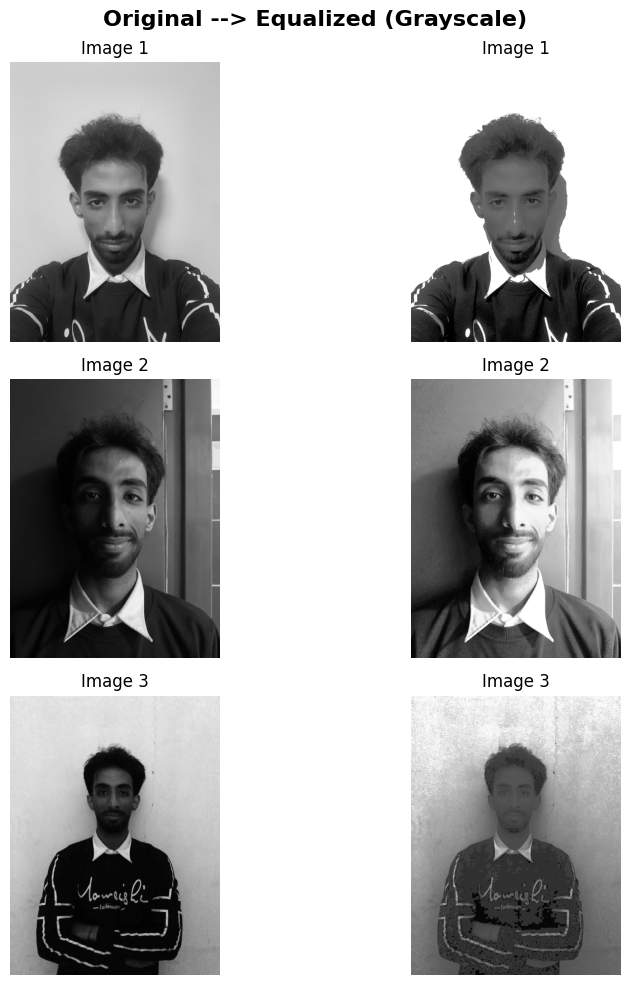

In [10]:
equalized_Imglist = []
for img in adjusted_Imglist:
    equalizedImg = cv.equalizeHist(img)
    equalized_Imglist.append(equalizedImg)


fig, axs = plt.subplots(len(equalized_Imglist), 2, figsize=(10, 10))
fig.suptitle('Original --> Equalized (Grayscale)', fontsize=16, fontweight='bold')

for i in range(len(equalized_Imglist)):
    axs[i, 0].imshow(listImg[i], cmap='gray')
    axs[i, 0].set_title(titles[i])
    axs[i, 0].axis('off')

    axs[i, 1].imshow(equalized_Imglist[i], cmap='gray')
    axs[i, 1].set_title(titles[i])
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()


# 4. Terapkan filter spasial:
# o Low-pass filter untuk menghaluskan noise kulit wajah.
# o High-pass atau Laplacian filter untuk menajamkan tepi mata dan bibir.

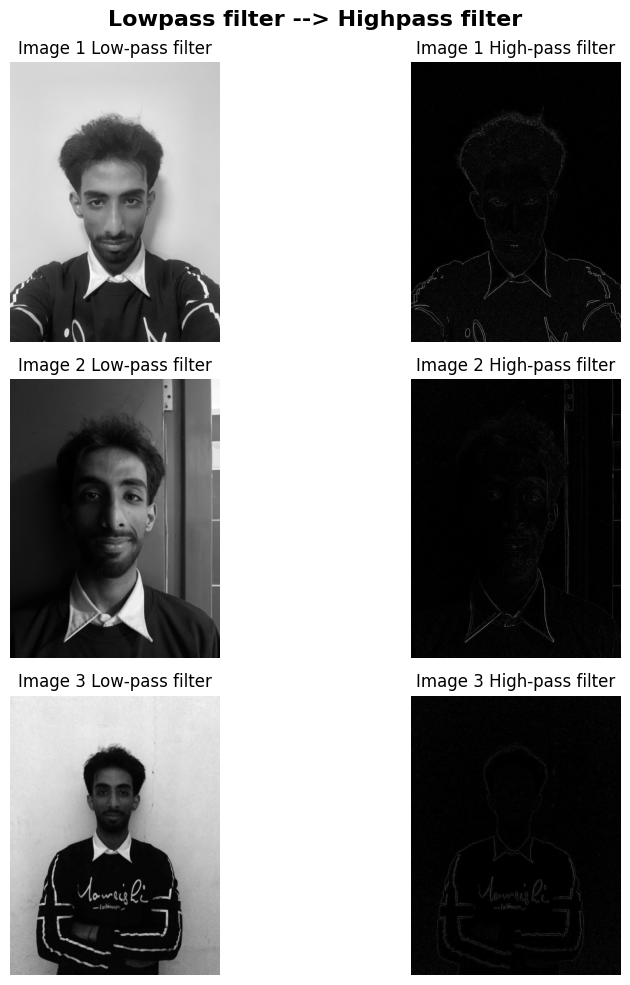

In [11]:
kernel = np.ones((3, 3), np.float32) / 9

smoothed_Imglist = []
for img in listImg:
    smoothedImg = cv.filter2D(img, -1, kernel)
    smoothed_Imglist.append(smoothedImg)


kernelHP = np.array([[-1, -1, -1],
                     [-1, 8, -1],
                     [-1, -1, -1]])


sharpened_Imglist = []
for i in range(len(listImg)):
    sharpenedImg = cv.filter2D(listImg[i], -1, kernelHP)
    sharpened_Imglist.append(sharpenedImg)


fig, axs = plt.subplots(len(equalized_Imglist), 2, figsize=(10, 10))
fig.suptitle('Lowpass filter --> Highpass filter', fontsize=16, fontweight='bold')
for i in range(len(listImg)):
  axs[i, 0].imshow(smoothed_Imglist[i], cmap='gray')
  axs[i, 0].set_title('Image ' + str(i+1) + ' Low-pass filter')
  axs[i, 0].axis('off')

  axs[i, 1].imshow(sharpened_Imglist[i], cmap='gray')
  axs[i, 1].set_title('Image ' + str(i+1) + ' High-pass filter')
  axs[i, 1].axis('off')

plt.tight_layout()
plt.show()


# 5. Implementasikan Floyd–Steinberg Dithering untuk menurunkan kedalaman warna wajah (bit-depth 4–6 bit), lalu analisis bagaimana efeknya terhadap detail dan ekspresi wajah.